## 6.4 Linear Regression Analysis

### This script contains the following:

#### 1. Importing libraries and data
#### 2. Data cleaning
#### 3. Data prep for regression analysis
#### 4. Regression analysis

### 1. Importing libraries and data

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [6]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [8]:
df = pd.read_csv(r'C:\Users\kasia\Desktop\Career Foundry\Achievement 6\World Universities Ranking\02 Data\Prepared Data\cleaned_data.csv')

### 2. Data cleaning

In [13]:
df.columns

Index(['Unnamed: 0', 'world_rank', 'institution', 'country', 'national_rank',
       'quality_of_education', 'alumni_employment', 'quality_of_faculty',
       'publications', 'influence', 'citations', 'broad_impact', 'patents',
       'score', 'year'],
      dtype='object')

In [15]:
df.head(20)

,Unnamed: 0,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,0,1,Harvard University,USA,1,7,9,1,1,1,1,496.6995,5,100.00,2012
1,1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,496.6995,1,91.67,2012
2,2,3,Stanford University,USA,3,17,11,5,4,2,2,496.6995,15,89.50,2012
3,3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,496.6995,50,86.17,2012
4,4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,496.6995,18,85.21,2012
5,5,6,Princeton University,USA,5,8,14,2,53,33,26,496.6995,101,82.50,2012
6,6,7,University of Oxford,United Kingdom,2,13,28,9,15,13,19,496.6995,26,82.34,2012
7,7,8,Yale University,USA,6,14,31,12,14,6,15,496.6995,66,79.14,2012
8,8,9,Columbia University,USA,7,23,21,10,13,12,14,496.6995,5,78.86,2012
9,9,10,"University of California, Berkeley",USA,8,16,52,6,6,5,3,496.6995,16,78.55,2012


In [17]:
df = df.drop(columns = ['Unnamed: 0'])

In [19]:
df.shape

(2200, 14)

In [21]:
# Check for missing values

df.isnull().sum()

# No missing values to handle

world_rank              0
institution             0
country                 0
national_rank           0
quality_of_education    0
alumni_employment       0
quality_of_faculty      0
publications            0
influence               0
citations               0
broad_impact            0
patents                 0
score                   0
year                    0
dtype: int64

In [23]:
dups = df.duplicated()

In [25]:
dups.shape # No dups

(2200,)

##### Extreme values checks

C:\Users\kasia\AppData\Local\Temp\ipykernel_11992\2940445378.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['publications'], bins=25)


<Axes: xlabel='publications', ylabel='Density'>

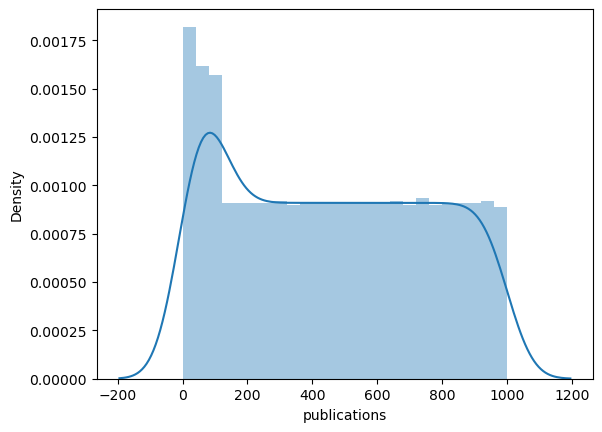

In [30]:
sns.distplot(df['publications'], bins=25)

In [32]:
df['publications'].mean() # Check the mean

459.9086363636364

In [34]:
df['publications'].median() # Check the median

450.5

In [36]:
df['publications'].max() # Check the max

1000

### 3. Data prep for regression analysis 

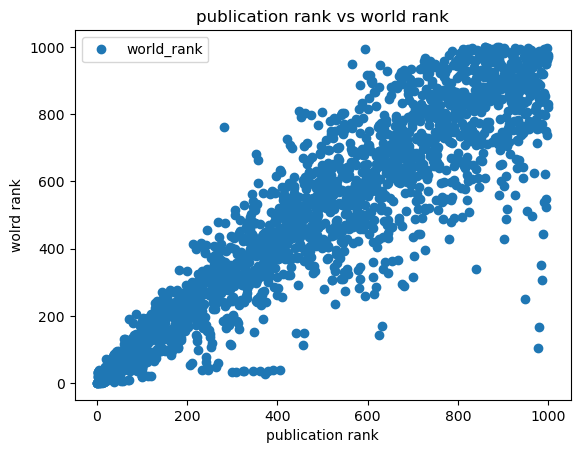

In [96]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'publications', y='world_rank',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('publication rank vs world rank')  
plt.xlabel('publication rank')
plt.ylabel('wolrd rank')  
plt.show()

#### Hypothesis: the higher the publications rank the higher the world rank

In [100]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['publications'].values.reshape(-1,1)
y = df['world_rank'].values.reshape(-1,1)

In [102]:
X

array([[  1],
       [ 12],
       [  4],
       ...,
       [830],
       [886],
       [861]], dtype=int64)

In [104]:
y

array([[   1],
       [   2],
       [   3],
       ...,
       [ 998],
       [ 999],
       [1000]], dtype=int64)

In [74]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 4. Regression analysis

In [76]:
# Create a regression object.

regression = LinearRegression()

In [78]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [80]:
# Predict the values of y using X

y_predicted = regression.predict(X_test)

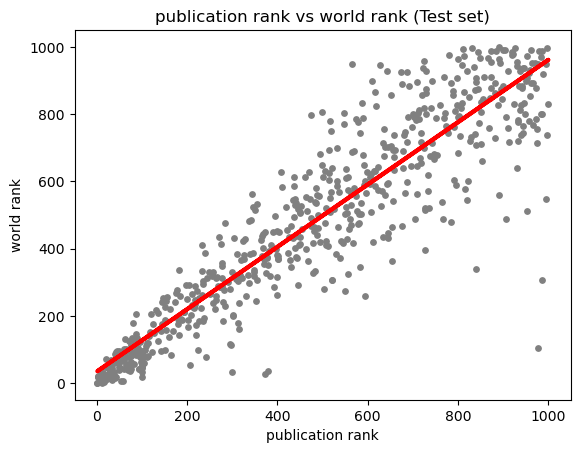

In [106]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('publication rank vs world rank (Test set)')
plot_test.xlabel('publication rank')
plot_test.ylabel('world rank')
plot_test.show()

##### The general upward direction and positive corelation is visible on the plot but there are a lot of scattered data points around the red regression line so it doesn’t perfectly cover all of the data points. There are quite few data point close to 1000 publication rank but are very low on world rank which would contradict my hypothesis.

In [84]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score.

In [86]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.92663174]]
Mean squared error:  13689.22850008424
R2 score:  0.8517912567513867


In [88]:
y_predicted

array([[139.59567827],
       [222.0659032 ],
       [147.93536393],
       [ 77.51135163],
       [557.50659337],
       [ 54.34555811],
       [330.48181688],
       [313.80244554],
       [236.89201105],
       [853.10211869],
       [574.18596471],
       [837.3493791 ],
       [726.1535702 ],
       [633.49039612],
       [923.526131  ],
       [516.73479678],
       [949.47181974],
       [611.25123434],
       [747.46610024],
       [868.85485829],
       [733.56662413],
       [522.29458722],
       [293.41654724],
       [599.20502171],
       [685.38177361],
       [892.94728355],
       [589.01207256],
       [397.19930221],
       [202.60663664],
       [104.38367212],
       [910.55328663],
       [ 97.89724993],
       [ 95.11735471],
       [297.12307421],
       [701.1345132 ],
       [938.35223885],
       [946.69192452],
       [672.40892924],
       [114.57662127],
       [639.97681831],
       [128.47609738],
       [633.49039612],
       [199.82674142],
       [200

In [64]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,113,147.324306
1,202,190.540189
2,122,120.659186
3,46,95.833040
4,564,522.474954
5,21,101.349961
6,319,372.598592
7,301,219.963769
8,218,263.179653
9,883,830.503060


The predicted vaules are very different from the actual values. I think the model performed pretty well, it was quite clear and visible straight away that many data points are from the regression line. It managed to grasp the general upward pattern but otherwise it was either over- or underestimating. Bias: if the training data mostly includes universities from certain regions or with specific traits, the model might not work well for other universities, such as those in developing countries. Additionally, certain features like publication counts or research funding might naturally favor well-established universities, leading the model to predict better ranks for them, which introduces bias.